In [1]:
# Import some libraries we'll need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math
import scipy.sparse as sps
from scipy.sparse import csr_matrix

In [2]:
def read_review_data(file_name):
    review_data = pd.read_csv(file_name)
    print "Sample Data"
    print "-----------"
    print review_data.sample(5)
    return review_data

In [3]:
business_data = pd.read_csv('CSV/business.csv')
business_data.head(1)

,hours.Wednesday,attributes.RestaurantsDelivery,attributes.Open24Hours,attributes.DogsAllowed,attributes.CoatCheck,postal_code,attributes.Smoking,hours.Thursday,attributes.DietaryRestrictions,city,...,attributes.RestaurantsAttire,hours.Sunday,attributes.GoodForMeal,attributes.GoodForDancing,attributes.AcceptsInsurance,attributes.RestaurantsReservations,attributes,attributes.RestaurantsTakeOut,attributes.BikeParking,attributes.OutdoorSeating
0,11:0-21:0,False,NaN,NaN,NaN,T2E 6L6,NaN,11:0-21:0,NaN,Calgary,...,casual,NaN,NaN,NaN,NaN,True,"{'BusinessParking': ""{'garage': False, 'street...",True,False,False


In [4]:
business_data.set_index('business_id', inplace = True)

In [5]:
def get_restaurant_data(review_data, business_data):
    review_data['city'] = review_data.apply(lambda x: business_data.loc[x['business_id'], 'city'], axis=1)
    review_data['cat'] = review_data.apply(lambda x: business_data.loc[x['business_id'], 'categories'], axis=1)
    restaurant_reviews = review_data[review_data['cat'].str.contains("Restaurants",na=False)]
    return restaurant_reviews

In [6]:
def get_city_restaurant_data(city, restaurant_reviews):
    city_rest_data = restaurant_reviews.loc[review_data['city'] == city]
    return city_rest_data

In [8]:
review_data = read_review_data('CSV/40core.csv')
print '-----------------------------'
print 'Filtering the Restaurant data'
print '-----------------------------'
restaurant_reviews = get_restaurant_data(review_data, business_data)
print restaurant_reviews.head(3)
print '-----------------------------'
print 'restaurant reviews top 10 cities'
print '-----------------------------'
print restaurant_reviews['city'].value_counts().head(10)
print '-----------------------------'
vegas_40 = get_city_restaurant_data('Las Vegas', restaurant_reviews)

Sample Data
-----------
                      user_id             business_id  stars
46126  uERlyO-ASZag6XXouCrkhg  LNGBEEelQx4zbfWnlc66cw      5
49295  cSvwgRq74ElhrE6AQEm3DQ  bjSC_jbrypke0l-bXXBmwQ      3
35239  lLfcbYGTeVxQN5Ig0ompJg  NY80DkkCfEl198JmwtO4pA      3
56453  _ijx1PqANQVFLGNWCibdig  zdE82PiD6wquvjYLyhOJNA      4
49959  ERcsc0YO5CCUbkC8EV2INg  ugLqbAvBdRDc-gS4hpslXw      4
-----------------------------
Filtering the Restaurant data
-----------------------------
                  user_id             business_id  stars       city  \
0  AuIK5tF2GjO7SftHawTLKw  I-5qHCVwT7k_KH67-YOx3A      4  Henderson   
2  AuIK5tF2GjO7SftHawTLKw  Zmfq3DVhHdtVChhSxzoUHw      4  Las Vegas   
3  AuIK5tF2GjO7SftHawTLKw  pybIuTluqRhH_BQ3CJHlLw      5  Las Vegas   

                                                 cat  
0  Desserts, Restaurants, American (Traditional),...  
2                                  Restaurants, Thai  
3                                  Thai, Restaurants  
---------------

In [9]:
vegas_40.head()

,user_id,business_id,stars,city,cat
2,AuIK5tF2GjO7SftHawTLKw,Zmfq3DVhHdtVChhSxzoUHw,4,Las Vegas,"Restaurants, Thai"
3,AuIK5tF2GjO7SftHawTLKw,pybIuTluqRhH_BQ3CJHlLw,5,Las Vegas,"Thai, Restaurants"
4,AuIK5tF2GjO7SftHawTLKw,SycXTaA4MeJZuDK4Y1owDQ,3,Las Vegas,"Burgers, Restaurants, Bars, Nightlife, Sports ..."
5,AuIK5tF2GjO7SftHawTLKw,5shgJB7a-2_gdnzc0gsOtg,5,Las Vegas,"Restaurants, Tapas/Small Plates, Tapas Bars"
6,AuIK5tF2GjO7SftHawTLKw,UvF68aNDfzCWQbxO6-647g,3,Las Vegas,"Restaurants, Vietnamese, Sandwiches"


In [10]:
vegas_40.reset_index(inplace=True)

In [11]:
cols = ['index', 'cat', 'city']
vegas_40.drop(cols, inplace=True, axis=1)

/anaconda2/lib/python2.7/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [12]:
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split

In [13]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(vegas_40[['user_id', 'business_id', 'stars']], reader)

In [14]:
sim_options = {'name': 'pearson_baseline',
               'user_based': False  # compute  similarities between items
               }
algorithm = KNNWithMeans(sim_options=sim_options, k=40)
trainset, testset = train_test_split(data, test_size=0.25)
predictions = algorithm.fit(trainset).test(testset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [15]:
accuracy.mae(predictions)

MAE:  0.7482


0.7481560236131495

In [16]:
sim_options = {'name': 'pearson_baseline',
               'user_based': False  # compute  similarities between items
               }
algorithm = KNNWithMeans(sim_options=sim_options, k=50)
predictions = algorithm.fit(trainset).test(testset)
accuracy.mae(predictions)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.7480


0.7480405270411938

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.8993
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.8992
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.8992
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.8992
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.8992
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.8992
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.8992


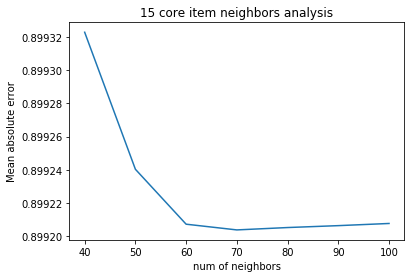

In [19]:
sim_options = {'name': 'pearson_baseline',
               'user_based': False  # compute  similarities between items
               }
k_list = [40,50,60,70,80,90,100]
res = []
for i in k_list:
    algorithm = KNNWithMeans(sim_options=sim_options, k=i)
    predictions = algorithm.fit(trainset).test(testset)
    res.append(accuracy.mae(predictions))
plt.plot(k_list, res)
plt.title('15 core item neighbors analysis')
plt.xlabel('num of neighbors')
plt.ylabel('Mean absolute error')
plt.show()

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.9077
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.9075
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.9075
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.9075
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.9075
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.9075
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.9074


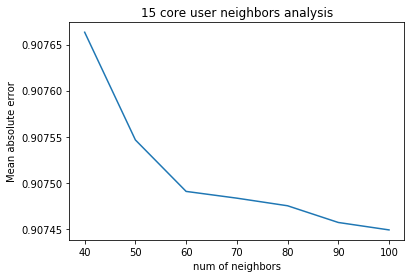

In [20]:
sim_options = {'name': 'pearson_baseline',
               'user_based': True  # compute  similarities between items
               }
k_list = [40,50,60,70,80,90,100]
res = []
for i in k_list:
    algorithm = KNNWithMeans(sim_options=sim_options, k=i)
    predictions = algorithm.fit(trainset).test(testset)
    res.append(accuracy.mae(predictions))
plt.plot(k_list, res)
plt.title('15 core user neighbors analysis')
plt.xlabel('num of neighbors')
plt.ylabel('Mean absolute error')
plt.show()

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.7482
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.7480
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.7481
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.7480
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.7480
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.7480
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.7480
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done co

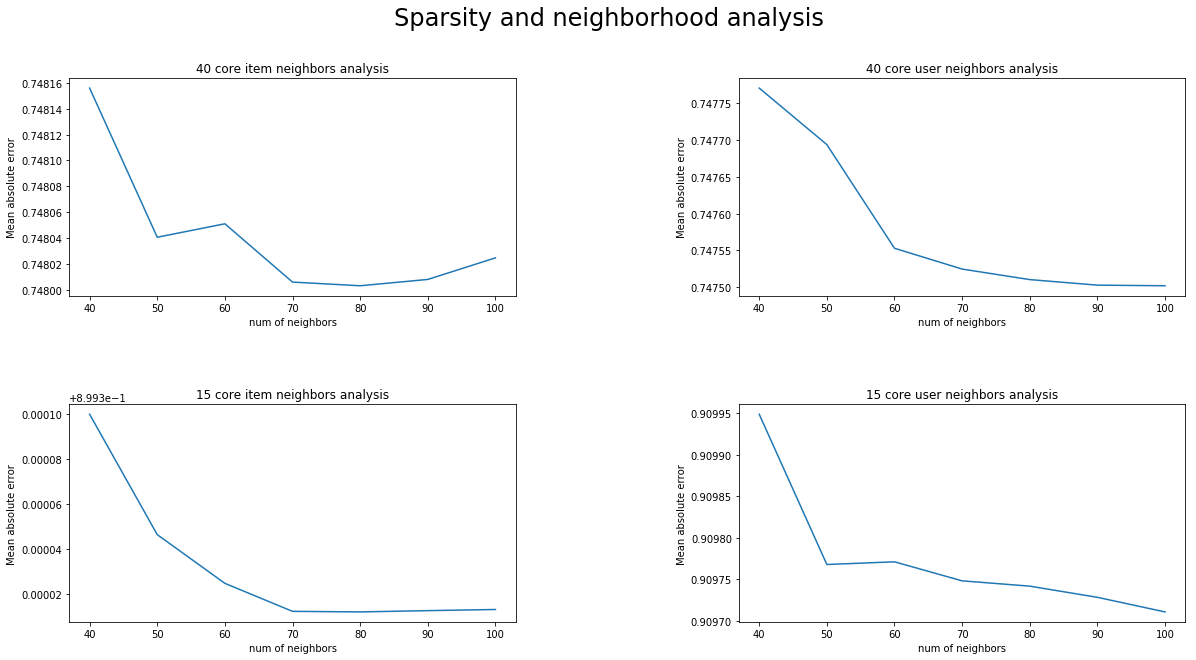

In [25]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
fig.suptitle('Sparsity and neighborhood analysis', fontsize=24)
fig.subplots_adjust(hspace=0.5, wspace=0.5)

sim_options = {'name': 'pearson_baseline',
               'user_based': False  # compute  similarities between items
               }
k_list = [40,50,60,70,80,90,100]
res = []
for i in k_list:
    algorithm = KNNWithMeans(sim_options=sim_options, k=i)
    predictions = algorithm.fit(trainset).test(testset)
    res.append(accuracy.mae(predictions))
ax[0][0].plot(k_list, res)
ax[0][0].set_title('40 core item neighbors analysis')
ax[0][0].set_xlabel('num of neighbors')
ax[0][0].set_ylabel('Mean absolute error')

sim_options = {'name': 'pearson_baseline',
               'user_based': True  # compute  similarities between items
               }
k_list = [40,50,60,70,80,90,100]
res = []
for i in k_list:
    algorithm = KNNWithMeans(sim_options=sim_options, k=i)
    predictions = algorithm.fit(trainset).test(testset)
    res.append(accuracy.mae(predictions))
ax[0][1].plot(k_list, res)
ax[0][1].set_title('40 core user neighbors analysis')
ax[0][1].set_xlabel('num of neighbors')
ax[0][1].set_ylabel('Mean absolute error')


review_data = read_review_data('CSV/15core.csv')
restaurant_reviews = get_restaurant_data(review_data, business_data)
vegas_40 = get_city_restaurant_data('Las Vegas', restaurant_reviews)


vegas_40.reset_index(inplace=True)
cols = ['index', 'cat', 'city']
vegas_40.drop(cols, inplace=True, axis=1)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(vegas_40[['user_id', 'business_id', 'stars']], reader)
trainset, testset = train_test_split(data, test_size=0.25)


sim_options = {'name': 'pearson_baseline',
               'user_based': False  # compute  similarities between items
               }
k_list = [40,50,60,70,80,90,100]
res = []
for i in k_list:
    algorithm = KNNWithMeans(sim_options=sim_options, k=i)
    predictions = algorithm.fit(trainset).test(testset)
    res.append(accuracy.mae(predictions))
ax[1][0].plot(k_list, res)
ax[1][0].set_title('15 core item neighbors analysis')
ax[1][0].set_xlabel('num of neighbors')
ax[1][0].set_ylabel('Mean absolute error')

sim_options = {'name': 'pearson_baseline',
               'user_based': True  # compute  similarities between items
               }
k_list = [40,50,60,70,80,90,100]
res = []
for i in k_list:
    algorithm = KNNWithMeans(sim_options=sim_options, k=i)
    predictions = algorithm.fit(trainset).test(testset)
    res.append(accuracy.mae(predictions))
ax[1][1].plot(k_list, res)
ax[1][1].set_title('15 core user neighbors analysis')
ax[1][1].set_xlabel('num of neighbors')
ax[1][1].set_ylabel('Mean absolute error')

plt.show()

[[<matplotlib.axes._subplots.AxesSubplot object at 0x119ed86d0>


Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.7482
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.7480
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.7481
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.7480
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.7480
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.7480
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.7480


AttributeError: 'AxesSubplot' object has no attribute 'show'

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.9077
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.9075
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.9075
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.9075
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.9075
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.9075
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.9074


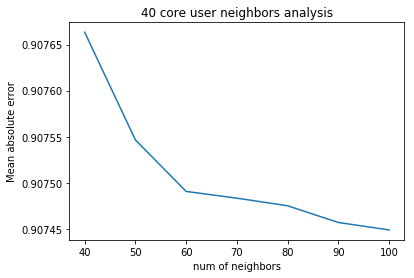